In [2]:
import time
import sys
import librosa as lr
import librosa.display as lrd
import numpy as np

import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline

sys.path.append("..")
from libs.processing import make_fragments, unmake_fragments, s_to_power, power_to_s

In [3]:
n_fft = 512
win = n_fft
hop = win // 4

x, sr = lr.load('/data/riccardo_datasets/npr_news/train/newscast230841.wav', sr=None, duration=5, offset=2)
s = lr.stft(x, n_fft=n_fft, hop_length=hop, win_length=win)
print(s.shape)


frag_hop = 4  # lr.time_to_frames(0.15, sr=sr, hop_length=hop, n_fft=win)
frag_win = lr.time_to_frames(0.275, sr=sr, hop_length=hop, n_fft=win)
print(frag_hop, frag_win)

s_power = s_to_power(s)

frags = np.array(make_fragments(s_power, frag_hop_len=frag_hop, frag_win_len=frag_win))
print(frags.shape)


(257, 626)
4 32
(149, 256, 32, 1)


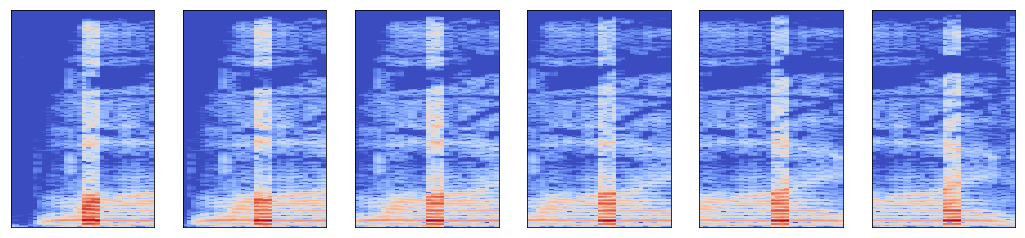

In [4]:
time_slice = frags.shape[2] // 2
frags[:,:,time_slice:time_slice+4] *= 100

plt.figure(figsize=(18, 4))
n = 6
for i in range(n):
    plt.subplot(1,n,1+i)
    lrd.specshow(lr.power_to_db(np.abs(frags[i,...,0])))

In [5]:
def unmake_fragments(s_frag, frag_hop_len, frag_win_len, time_slice=None):
    # store input shape
    in_shape = s_frag.shape
    # multiple input shape support
    spec_length = (in_shape[0]-1) * frag_hop_len + frag_win_len
    output_shape = (in_shape[1], spec_length, in_shape[-1]) if len(in_shape) == 4 else (in_shape[1], spec_length)
    # arbitrary time slice support
    if time_slice is None:
        # this uses the first half
        time_slice = slice(frag_hop_len)
    elif isinstance(time_slice, int) or isinstance(time_slice, np.generic): 
        time_slice = slice(time_slice, time_slice+frag_hop_len)
        print(time_slice)
    # initialize recipient
    s = np.zeros(output_shape, dtype=s_frag.dtype)
    #plt.figure(figsize=(18, 8))
    for i, frag in enumerate(s_frag):
        frag = frag[...,time_slice,:] if len(frag.shape) == 3 else frag[...,time_slice]
        lower_bound = i*frag_hop_len
        upper_bound = (i+1)*frag_hop_len
        #upper_bound = i*frag_hop_len+frag_win_len
        #print(s[:, lower_bound:upper_bound].shape, frag.shape)
        s[:, lower_bound:upper_bound] = frag

    return s

In [6]:
s_power_sig = unmake_fragments(frags, frag_hop_len=frag_hop, frag_win_len=frag_win, time_slice=frag_win//2)

s_sig = power_to_s(np.abs(s_power_sig))
s_sig_len = s_sig.shape[1]
print(frags.shape)
print(s_sig.shape)
sig = lr.istft(s_sig, hop_length=hop, win_length=win)


slice(16, 20, None)
(149, 256, 32, 1)
(257, 624)


(257, 624)


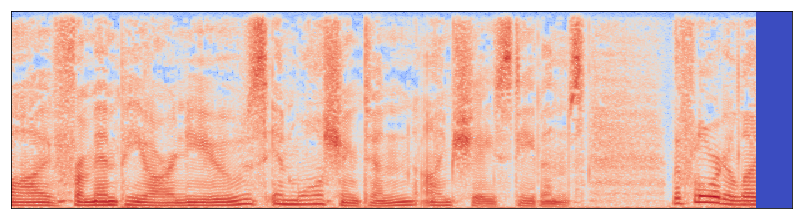

In [7]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
print(s_sig.shape)
lrd.specshow(lr.power_to_db(np.abs(s_sig)))
ipd.Audio(sig, rate=sr)

In [96]:
a = np.ones((256, 32, 1))

In [97]:
a[...,16:17,:].shape

(256, 1, 1)